<a href="https://colab.research.google.com/github/dorsaalh/Cryptocurrency_Price_Prediction/blob/main/Initial_Finbert_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Dense, Dropout, Input, Average , LayerNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical, plot_model
from keras.models import Model
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau
from keras import optimizers
import seaborn as sns
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/finbert_model_data.csv')

In [ ]:
dataset.label.value_counts()

0    329
1    109
2     72
Name: label, dtype: int64

In [ ]:
y = pd.get_dummies(dataset.label, prefix='Label')

In [ ]:
dataset['Neutral'] = y.Label_0
dataset['Positive'] = y.Label_1
dataset['Negative'] = y.Label_2

dataset.drop(columns = ['Unnamed: 0', 'label'], inplace=True)
dataset

,pos,neg,neu,Neutral,Positive,Negative
0,0.071355,0.805274,0.123371,1,0,0
1,0.792175,0.162709,0.045116,1,0,0
2,0.944452,0.033538,0.022010,1,0,0
3,0.021651,0.328132,0.650216,1,0,0
4,0.046873,0.051018,0.902109,1,0,0
...,...,...,...,...,...,...
505,0.137001,0.024401,0.838599,1,0,0
506,0.023538,0.045532,0.930929,1,0,0
507,0.024597,0.043406,0.931997,1,0,0
508,0.033435,0.030385,0.936179,1,0,0


In [ ]:
X = dataset.drop(columns = ['pos','neg', 'neu'])
Y = dataset.drop(columns = ['Neutral','Positive', 'Negative'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 41)

In [ ]:
X_train.shape

(408, 3)

In [ ]:
X_test.shape

(102, 3)

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=3)
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.1, patience=3, min_lr=1e-10) 

In [ ]:
input_layer = Input(X_train.shape[1], name='Input')
hidden_layer_1 = Dense(8, activation='relu', name='first_layer')(input_layer)
hidden_layer_2 = Dense(16, activation='relu', name='second_layer')(hidden_layer_1)
output_layer = Dense(3, activation='softmax', name='out_layer')(hidden_layer_2)
model = Model(inputs=input_layer , outputs=output_layer, name='model')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 3)]               0         
                                                                 
 first_layer (Dense)         (None, 8)                 32        
                                                                 
 second_layer (Dense)        (None, 16)                144       
                                                                 
 out_layer (Dense)           (None, 3)                 51        
                                                                 
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = SGD(learning_rate=0.001, momentum= 0.7)  #ADAM
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=64, epochs=500, verbose=1, validation_split=0.2, callbacks=[es, lrr 
                                                                                                         #   , checkpointer
                                                                                                            ])

Epoch 1/500
6/6 [==============================] - 0s 32ms/step - loss: 1.1413 - accuracy: 0.1902 - val_loss: 1.1427 - val_accuracy: 0.2561 - lr: 0.0010
Epoch 2/500
6/6 [==============================] - 0s 7ms/step - loss: 1.1306 - accuracy: 0.3160 - val_loss: 1.1299 - val_accuracy: 0.2561 - lr: 0.0010
Epoch 3/500
6/6 [==============================] - 0s 6ms/step - loss: 1.1190 - accuracy: 0.3160 - val_loss: 1.1176 - val_accuracy: 0.2561 - lr: 0.0010
Epoch 4/500
6/6 [==============================] - 0s 6ms/step - loss: 1.1087 - accuracy: 0.3160 - val_loss: 1.1061 - val_accuracy: 0.2561 - lr: 0.0010
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0978 - accuracy: 0.3160 - val_loss: 1.0945 - val_accuracy: 0.2561 - lr: 0.0010
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0878 - accuracy: 0.3160 - val_loss: 1.0835 - val_accuracy: 0.2561 - lr: 0.0010
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0779 - accurac

In [ ]:
# model.save_weights("/gdrive/My Drive/ANN_TA/MNIST_weights.h5")
# model.save("/gdrive/My Drive/ANN_TA/MNIST_model.h5")

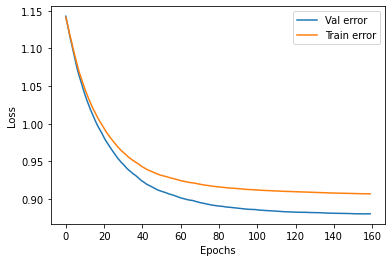

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

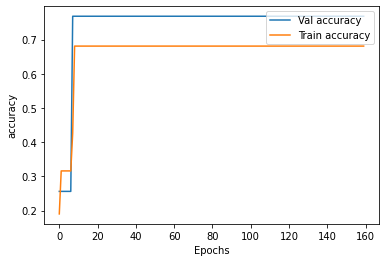

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()